## 구글 플레이 스토어 '차이 코퍼레이션 앱 별점 리뷰' 웹 크롤링

In [164]:
#google-play-scraper python library

!pip install google-play-scraper

In [165]:
# 라이브러리
import pandas as pd
import numpy as np
from google_play_scraper import app, Sort, reviews_all, reviews
import warnings

In [166]:
# url 입력
url_ck = 'com.devsisters.ck'

In [167]:
# 차이코퍼레이션 앱 정보 크롤링
app_ck= app(url_ck,
                  lang = "ko", # defaults = "en"
                  country = "kr" # defaults to "us"
                 )

In [168]:
# 데이터프레임 변환
df_app_ck = pd.DataFrame.from_dict(app_ck, orient = "index").head(3)
df_app_ck

,0
title,쿠키런: 킹덤
description,"◼︎ 모두가 사랑하는 쿠키런: 킹덤의 주인공, 쿠키\r\n화려한 성우진이 참여한 각..."
descriptionHTML,"◼︎ 모두가 사랑하는 쿠키런: 킹덤의 주인공, 쿠키<br>화려한 성우진이 참여한 각..."


In [169]:
# 차이코퍼레이션  앱 리뷰 크롤링
review_ck = reviews_all(url_ck,
                             sleep_milliseconds = 1000,
                             lang = "ko",# default = "en"
                             country = "kr", # default = "US"
                             sort = Sort.NEWEST, # Sort.NEWEST
                             filter_score_with = None # None means All score
                            )



KeyboardInterrupt: 

In [146]:
# 데이터프레임 변환
df_review_ck = pd.DataFrame(review_ck)
df_review_ck.head(5)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,85c4e62c-83fd-4ff9-813b-3b92b9e64f60,곽종태,https://play-lh.googleusercontent.com/a/AEdFTp...,10회뽑기를 20번이나했는대 전설쿠키가하나도 안떴어요 ㅠㅠ 이거 확률이 썩음ㅠㅠ,5,0,3.11.102,2023-01-11 10:01:11,None,NaT
1,e0be48f8-20c5-4937-8239-d7480275ba58,오영아,https://play-lh.googleusercontent.com/a-/AD5-W...,너무나 광고과 안나와요 그리고 쿠키들과 해서 좋아요,5,0,3.12.002,2023-01-11 10:01:11,None,NaT
2,38f04372-fd5c-4319-9930-64b45b0171fd,최동찬,https://play-lh.googleusercontent.com/a/AEdFTp...,....? 아니 로딩이 100%인데 업데이트가 안되서 몇개월 동안 못합니다. 좀 고...,3,1,3.9.102,2023-01-11 09:32:19,None,NaT
3,f7282621-a10f-46e0-90b8-d7ec08ba1c10,김동용,https://play-lh.googleusercontent.com/a-/AD5-W...,재미어요♡♡,5,0,3.1.102,2023-01-11 09:31:01,None,NaT
4,ac0c8774-a198-42ac-8b93-fc347a99d422,풀풀2tv,https://play-lh.googleusercontent.com/a-/AD5-W...,쿠키런 킹덤을하고싶은데안들어가져요,3,0,3.12.002,2023-01-11 08:52:58,None,NaT


In [147]:
df_review_ck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138369 entries, 0 to 138368
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              138369 non-null  object        
 1   userName              138369 non-null  object        
 2   userImage             138369 non-null  object        
 3   content               138369 non-null  object        
 4   score                 138369 non-null  int64         
 5   thumbsUpCount         138369 non-null  int64         
 6   reviewCreatedVersion  123395 non-null  object        
 7   at                    138369 non-null  datetime64[ns]
 8   replyContent          290 non-null     object        
 9   repliedAt             290 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 10.6+ MB


In [148]:
df_review_ck['at'].head()

0   2023-01-11 10:01:11
1   2023-01-11 10:01:11
2   2023-01-11 09:32:19
3   2023-01-11 09:31:01
4   2023-01-11 08:52:58
Name: at, dtype: datetime64[ns]

In [149]:
df_review_ck['score'].unique()

array([5, 3, 4, 1, 2])

In [150]:
df_review_ck['content'].head(10)

0         10회뽑기를 20번이나했는대 전설쿠키가하나도 안떴어요 ㅠㅠ 이거 확률이 썩음ㅠㅠ
1                         너무나 광고과 안나와요 그리고 쿠키들과 해서 좋아요
2    ....? 아니 로딩이 100%인데 업데이트가 안되서 몇개월 동안 못합니다. 좀 고...
3                                               재미어요♡♡
4                                   쿠키런 킹덤을하고싶은데안들어가져요
5                              게임은 재밌고 그런데 업데이트가 잘 않돼요
6                                   복귀유저에게는 너무나도 어려운게임
7                                   보석 10000개 하면 리뷰 5로
8                                 지용이가 ㅊㅊ해줌 다시 잘되게해주세요
9                     말할것도 없이 재미있어요 뭘봐요! 빨리 게임 깔고 오세요!
Name: content, dtype: object

In [151]:
df_review_ck['thumbsUpCount'].unique()

array([   0,    1,    3,    7,    2,  185,  239,   29,  266,    4,   27,
         13,   44, 1685,    8,   54,   39,   65,   41,   14,    9,    5,
          6,   12,   16,   31,  456,   20,   11,   10,   33,  179,   30,
         19,  665,   43,   77,   36,   28,   24, 1045,   49,   93,  543,
       1125,   15,  276,  240,  245,   26,   17,   25,  576,   67,   21,
        189,   45,   38,  170,   82, 1124,  274,   50,   72,  233,  124,
        149,  106,  818,   52,   23,   34,  966, 1337,   66,  339,  349,
        262,  135,  250,  955,   42,  213,   32,   59,  134,   60,  203,
        420, 3040,  511,  161,  169,   88,  427,   18,  397,  131, 1578,
         47, 1645,   95,   81,  173,   63,  107,  132,  100,   57, 1060,
         22, 1604,  200,   46,   58,  102,   61,   53,  117,  533,  224,
        151, 1058,  562,  137,  110,  191,  136, 1067,  206,   94,   80,
        172,   90,   75,   91,  190,  127,  126, 2504,  109,  946,   68,
        503,  297, 2541,  899, 2935,   86,  249,  3

In [152]:
df_review_ck['thumbsUpCount']

0            0
1            0
2            1
3            0
4            0
          ... 
138364      55
138365     977
138366       0
138367      74
138368    2401
Name: thumbsUpCount, Length: 138369, dtype: int64

In [102]:
#df_2020_03 = df_review_chai[df_review_chai['at'].between('2019-08-01', '2020-03-31')]


In [153]:
df_review_ck.rename({'at':'날짜','content':'리뷰내용','score':'별점','thumbsUpCount':'리뷰동조자수'}, axis=1,inplace=True)


In [154]:
# 여러 컬럼 동시 접근

df_review_ck[['날짜','리뷰내용', '별점', '리뷰동조자수']]


,날짜,리뷰내용,별점,리뷰동조자수
0,2023-01-11 10:01:11,10회뽑기를 20번이나했는대 전설쿠키가하나도 안떴어요 ㅠㅠ 이거 확률이 썩음ㅠㅠ,5,0
1,2023-01-11 10:01:11,너무나 광고과 안나와요 그리고 쿠키들과 해서 좋아요,5,0
2,2023-01-11 09:32:19,....? 아니 로딩이 100%인데 업데이트가 안되서 몇개월 동안 못합니다. 좀 고...,3,1
3,2023-01-11 09:31:01,재미어요♡♡,5,0
4,2023-01-11 08:52:58,쿠키런 킹덤을하고싶은데안들어가져요,3,0
...,...,...,...,...
138364,2021-01-20 17:32:08,제발 롱런하자,5,55
138365,2021-01-20 17:28:32,좋아용.쿠키런캐릭터가용^^,4,977
138366,2021-01-20 17:21:10,굿겜,5,0
138367,2021-01-20 17:17:42,기대해봄니당,5,74


In [155]:

df_review_ck = df_review_ck[['날짜','리뷰내용', '별점', '리뷰동조자수']]

In [54]:
df_review_ck= df_review_ck.to_excel('/Users/soon/Desktop/devsisters_ck_review.xlsx', index=False)

In [156]:
df_review_ck1 = df_review_ck.to_csv('/Users/soon/Desktop/devsisters_ck_review.txt', index=False)


## 구글 플레이 스토어 '쿠키런 : 킹덤' 텍스트 마이닝



In [170]:
# 한글자연어 처리 라이브러리 설치
!pip install wordcloud


In [171]:
!pip install nltk


In [172]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter


In [173]:
# 데이터 불러오기

file = open('/Users/soon/Desktop/devsisters_ck_review.txt', 'r')




In [174]:
lists = file.readlines()

file.close()


In [175]:
lists


['날짜,리뷰내용,별점,리뷰동조자수\n',
 '2023-01-11 10:01:11,10회뽑기를 20번이나했는대 전설쿠키가하나도 안떴어요 ㅠㅠ 이거 확률이 썩음ㅠㅠ,5,0\n',
 '2023-01-11 10:01:11,너무나 광고과 안나와요 그리고 쿠키들과 해서 좋아요,5,0\n',
 '2023-01-11 09:32:19,....? 아니 로딩이 100%인데 업데이트가 안되서 몇개월 동안 못합니다. 좀 고쳐주세요,3,1\n',
 '2023-01-11 09:31:01,재미어요♡♡,5,0\n',
 '2023-01-11 08:52:58,쿠키런 킹덤을하고싶은데안들어가져요,3,0\n',
 '2023-01-11 08:07:06,게임은 재밌고 그런데 업데이트가 잘 않돼요,4,0\n',
 '2023-01-11 07:34:41,복귀유저에게는 너무나도 어려운게임,1,0\n',
 '2023-01-11 07:32:24,보석 10000개 하면 리뷰 5로,4,0\n',
 '2023-01-11 07:29:11,지용이가 ㅊㅊ해줌 다시 잘되게해주세요,5,0\n',
 '2023-01-11 01:04:34,말할것도 없이 재미있어요 뭘봐요! 빨리 게임 깔고 오세요!,5,0\n',
 '2023-01-11 00:27:33,쿠폰 좀 만들어라 데브시스터즈,1,0\n',
 '2023-01-10 23:47:22,너무게임 안에귀여운쿠키을 보머진짜쿠키를 먹고습퍽요,5,0\n',
 '2023-01-10 23:28:39,지민좀 나옵시다 데브^^,5,1\n',
 '2023-01-10 23:23:01,"월드탐험 11챕터 난이도가 들쑥날쑥입니다 잘 진행하다가 11-23, 11-27 부분만 막혀서 앞으로 나가질 못해요 11-23 딸기맛 마법사맛 나오면서 쿠키들 다 썰리는거 겨우겨우 전체적으로 레벨 4씩올려서 별 두개로 겨우 클리어했고 11-27 라즈베리맛 나오는 구간 전에 체력 이리저리 까인다음에 라즈베리맛 나오자마자 레벨 55에 4성 마법사탕 6렙 찍은 에스프레소 날아가고 다른 쿠키들도 한순간에 녹아버리더군요... 11-

In [176]:
twitter = Twitter()


/opt/anaconda3/lib/python3.9/site-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [177]:
#코드 설명 , morphs = [] morphs라는 빈 리스트를 만들고 그 리스트에 추가(append)한다.

#무엇을? lists에 있는 글(sentence)의 형태소를 분석한(twitter) 결과를.  

morphs = []
 
for sentence in lists:
    morphs.append(twitter.pos(sentence))
    
print(morphs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [246]:
noun_adj_adv_list=[]
 
for sentence in morphs :
    for word, tag in sentence :
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word)and("때"not in word)and("거"not in word)and("이"not in word):
            noun_adj_adv_list.append(word)
            
print(noun_adj_adv_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [247]:
#Counter는 위에서 말했듯이 카운팅 해주는 패키지.  이를 내가 만든 최종 리스트(noun_adj_adv_list)에 적용시킨다. 

#리스트에서 빈도수대로 단어를 정렬(most_common)하고 이를 딕셔너리(dict) 형태로 출력한다.

count = Counter(noun_adj_adv_list)


In [248]:
words = dict(count.most_common())


In [249]:
words

{'쿠키': 19581,
 '좀': 9519,
 '쿠키런': 8000,
 '겜': 6642,
 '킹덤': 6553,
 '진짜': 6186,
 '뽑기': 6146,
 '재미': 5374,
 '과금': 5320,
 '개': 5310,
 '확률': 5135,
 '굿': 5121,
 '제': 5110,
 '유저': 4613,
 '계속': 4354,
 '꿀잼': 3995,
 '현질': 3912,
 '점': 3797,
 '보상': 3730,
 '더': 3702,
 '렉': 3698,
 '무': 3642,
 '저': 3510,
 '왜': 3403,
 '버그': 3350,
 '스토리': 3294,
 '캐릭터': 3249,
 '맛': 3186,
 '점검': 3179,
 '다시': 2986,
 '시간': 2924,
 '에픽': 2807,
 '안': 2801,
 '데브': 2769,
 '요': 2577,
 '크리스탈': 2538,
 '생각': 2529,
 '추천': 2339,
 '그냥': 2331,
 '제발': 2325,
 '조금': 2288,
 '접속': 2273,
 '별': 2181,
 '시작': 2171,
 '번': 2168,
 '지금': 2112,
 '오류': 2099,
 '처음': 2087,
 '왕국': 2074,
 '정도': 2006,
 '문제': 1995,
 '아주': 1961,
 '최고': 1945,
 '한번': 1937,
 '사람': 1919,
 '뭐': 1838,
 '보석': 1789,
 '자꾸': 1782,
 '화면': 1752,
 '레벨': 1750,
 '잼': 1727,
 '업뎃': 1719,
 '완전': 1716,
 '계정': 1673,
 '폰': 1666,
 '별사탕': 1664,
 '해': 1661,
 '전': 1619,
 '전투': 1619,
 '그': 1608,
 '친구': 1605,
 '또': 1575,
 '유도': 1537,
 '서버': 1498,
 '다른': 1496,
 '컨텐츠': 1489,
 '바': 1470,
 '일단': 1436,
 '

In [250]:
from wordcloud import WordCloud 

import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from PIL import *
import os

In [280]:
%matplotlib inline

import matplotlib
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')

set_matplotlib_formats('retina')

matplotlib.rc('axes',unicode_minus = False)


/var/folders/s5/p9v5v4795132_w2y_ymwbtk80000gn/T/ipykernel_21141/1842996813.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [281]:
#워드클라우드의 모양 설정. 원모양의 이미지를 그대로 가져와 만들도록 하였음.

cand_mask = np.array(Image.open(os.path.join(r'/Users/soon/Desktop/my_image/circle.png')))

In [282]:
wordcloud = WordCloud(
    font_path = '/Users/soon/Downloads/CookieRunFont_TTF/CookieRun Regular.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='White',                             # 배경 색깔 정하기
    colormap = 'Oranges', 
    mask=cand_mask,# 폰트 색깔 정하기
    width = 800,
    height = 800,
)

wordcloud_words = wordcloud.generate_from_frequencies(words)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<class 'numpy.ndarray'>
(401, 390, 3)


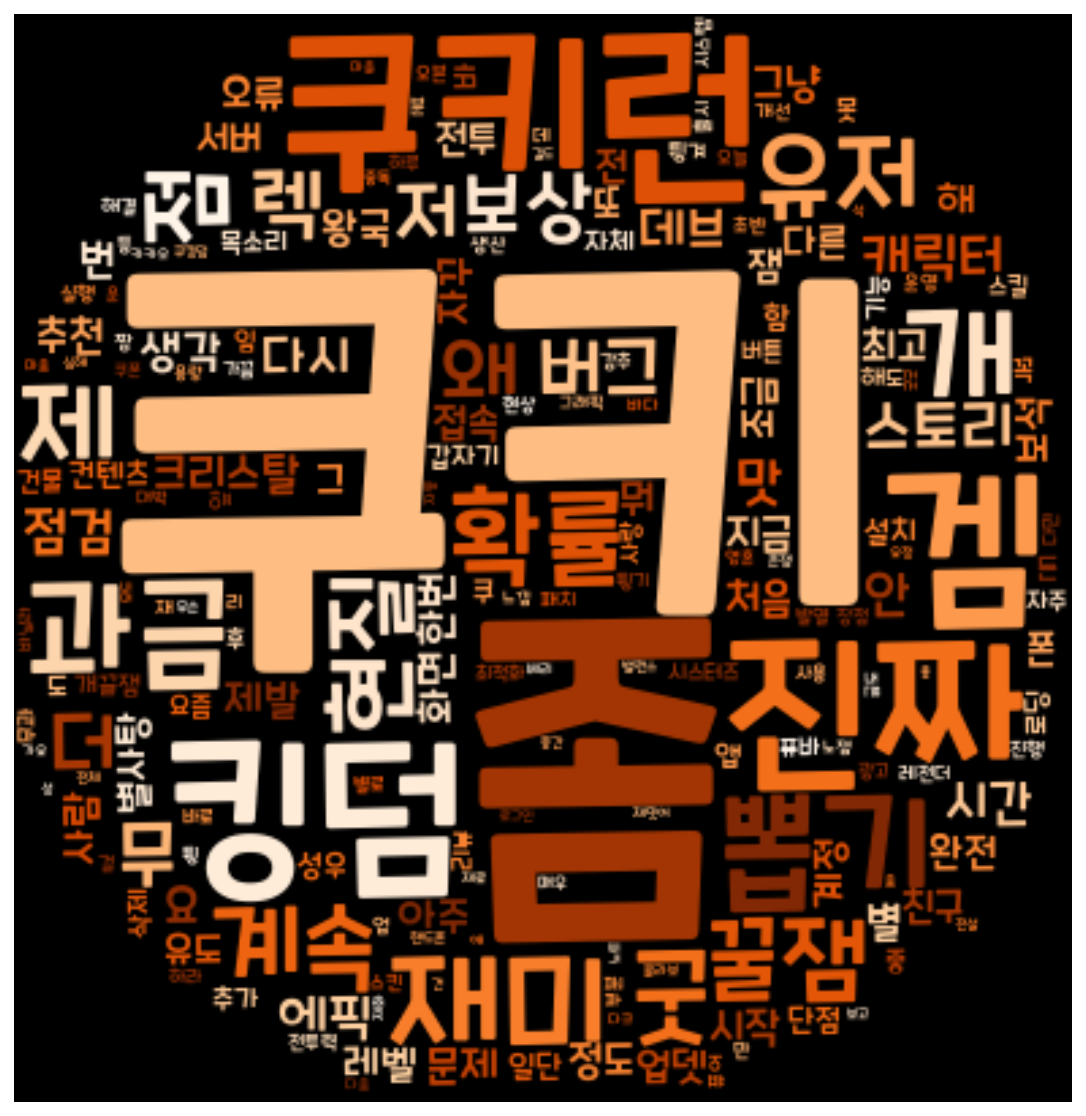

In [261]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('business_anlytics_worldcloud.png')

In [262]:
df = pd.DataFrame(words, index=[0])


In [263]:
words = df.T.reset_index()
words

,index,0
0,쿠키,19581
1,좀,9519
2,쿠키런,8000
3,겜,6642
4,킹덤,6553
...,...,...
20826,에렣헿,1
20827,뢍,1
20828,쿠워,1
20829,꺄꺄,1


In [264]:
words.columns = ['연관어', '빈도수']
words.columns

Index(['연관어', '빈도수'], dtype='object')

In [265]:
words.loc[:, '빈도수순위'] = words.loc[:, '빈도수'].rank(axis=0, method='min', ascending=False)
words_test = words.sort_values(by=['빈도수순위'], ascending=True, ignore_index=False, inplace=False)



In [266]:
words_test.head(20)

,연관어,빈도수,빈도수순위
0,쿠키,19581,1.0
1,좀,9519,2.0
2,쿠키런,8000,3.0
3,겜,6642,4.0
4,킹덤,6553,5.0
5,진짜,6186,6.0
6,뽑기,6146,7.0
7,재미,5374,8.0
8,과금,5320,9.0
9,개,5310,10.0
